In [1]:
import kagglehub

path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

c:\Users\micha\anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\micha\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1


In [51]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
file_name = [file for file in os.listdir(path) if file.endswith('.csv')][0]
file_path = os.path.join(path, file_name)
data = pd.read_csv(file_path)

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.shape

(918, 12)

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
data['ST_Slope'] = data['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [8]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


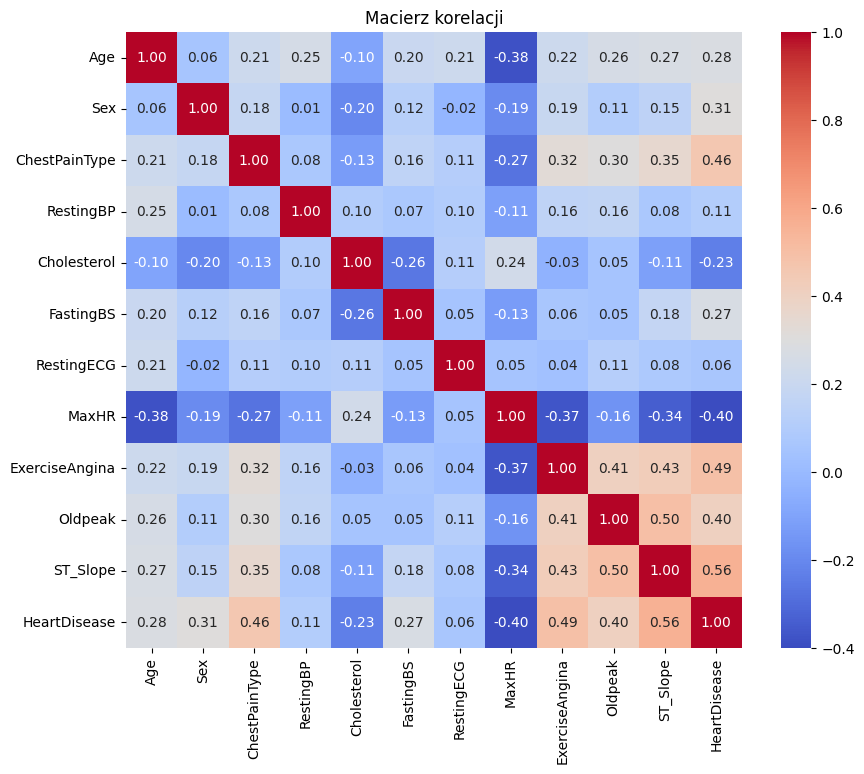

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Rozmiar wykresu
sns.heatmap(
    correlation_matrix,       # Macierz korelacji
    annot=True,               # Wyświetl wartości na heatmapie
    fmt=".2f",                # Format wartości (2 miejsca po przecinku)
    cmap="coolwarm",          # Kolorystyka ("coolwarm" dobrze pokazuje różnice)
    cbar=True,                # Pokaż pasek kolorów (barwa intensywności)
    square=True               # Kwadratowe pola
)
plt.title("Macierz korelacji")  # Tytuł wykresu
plt.show()

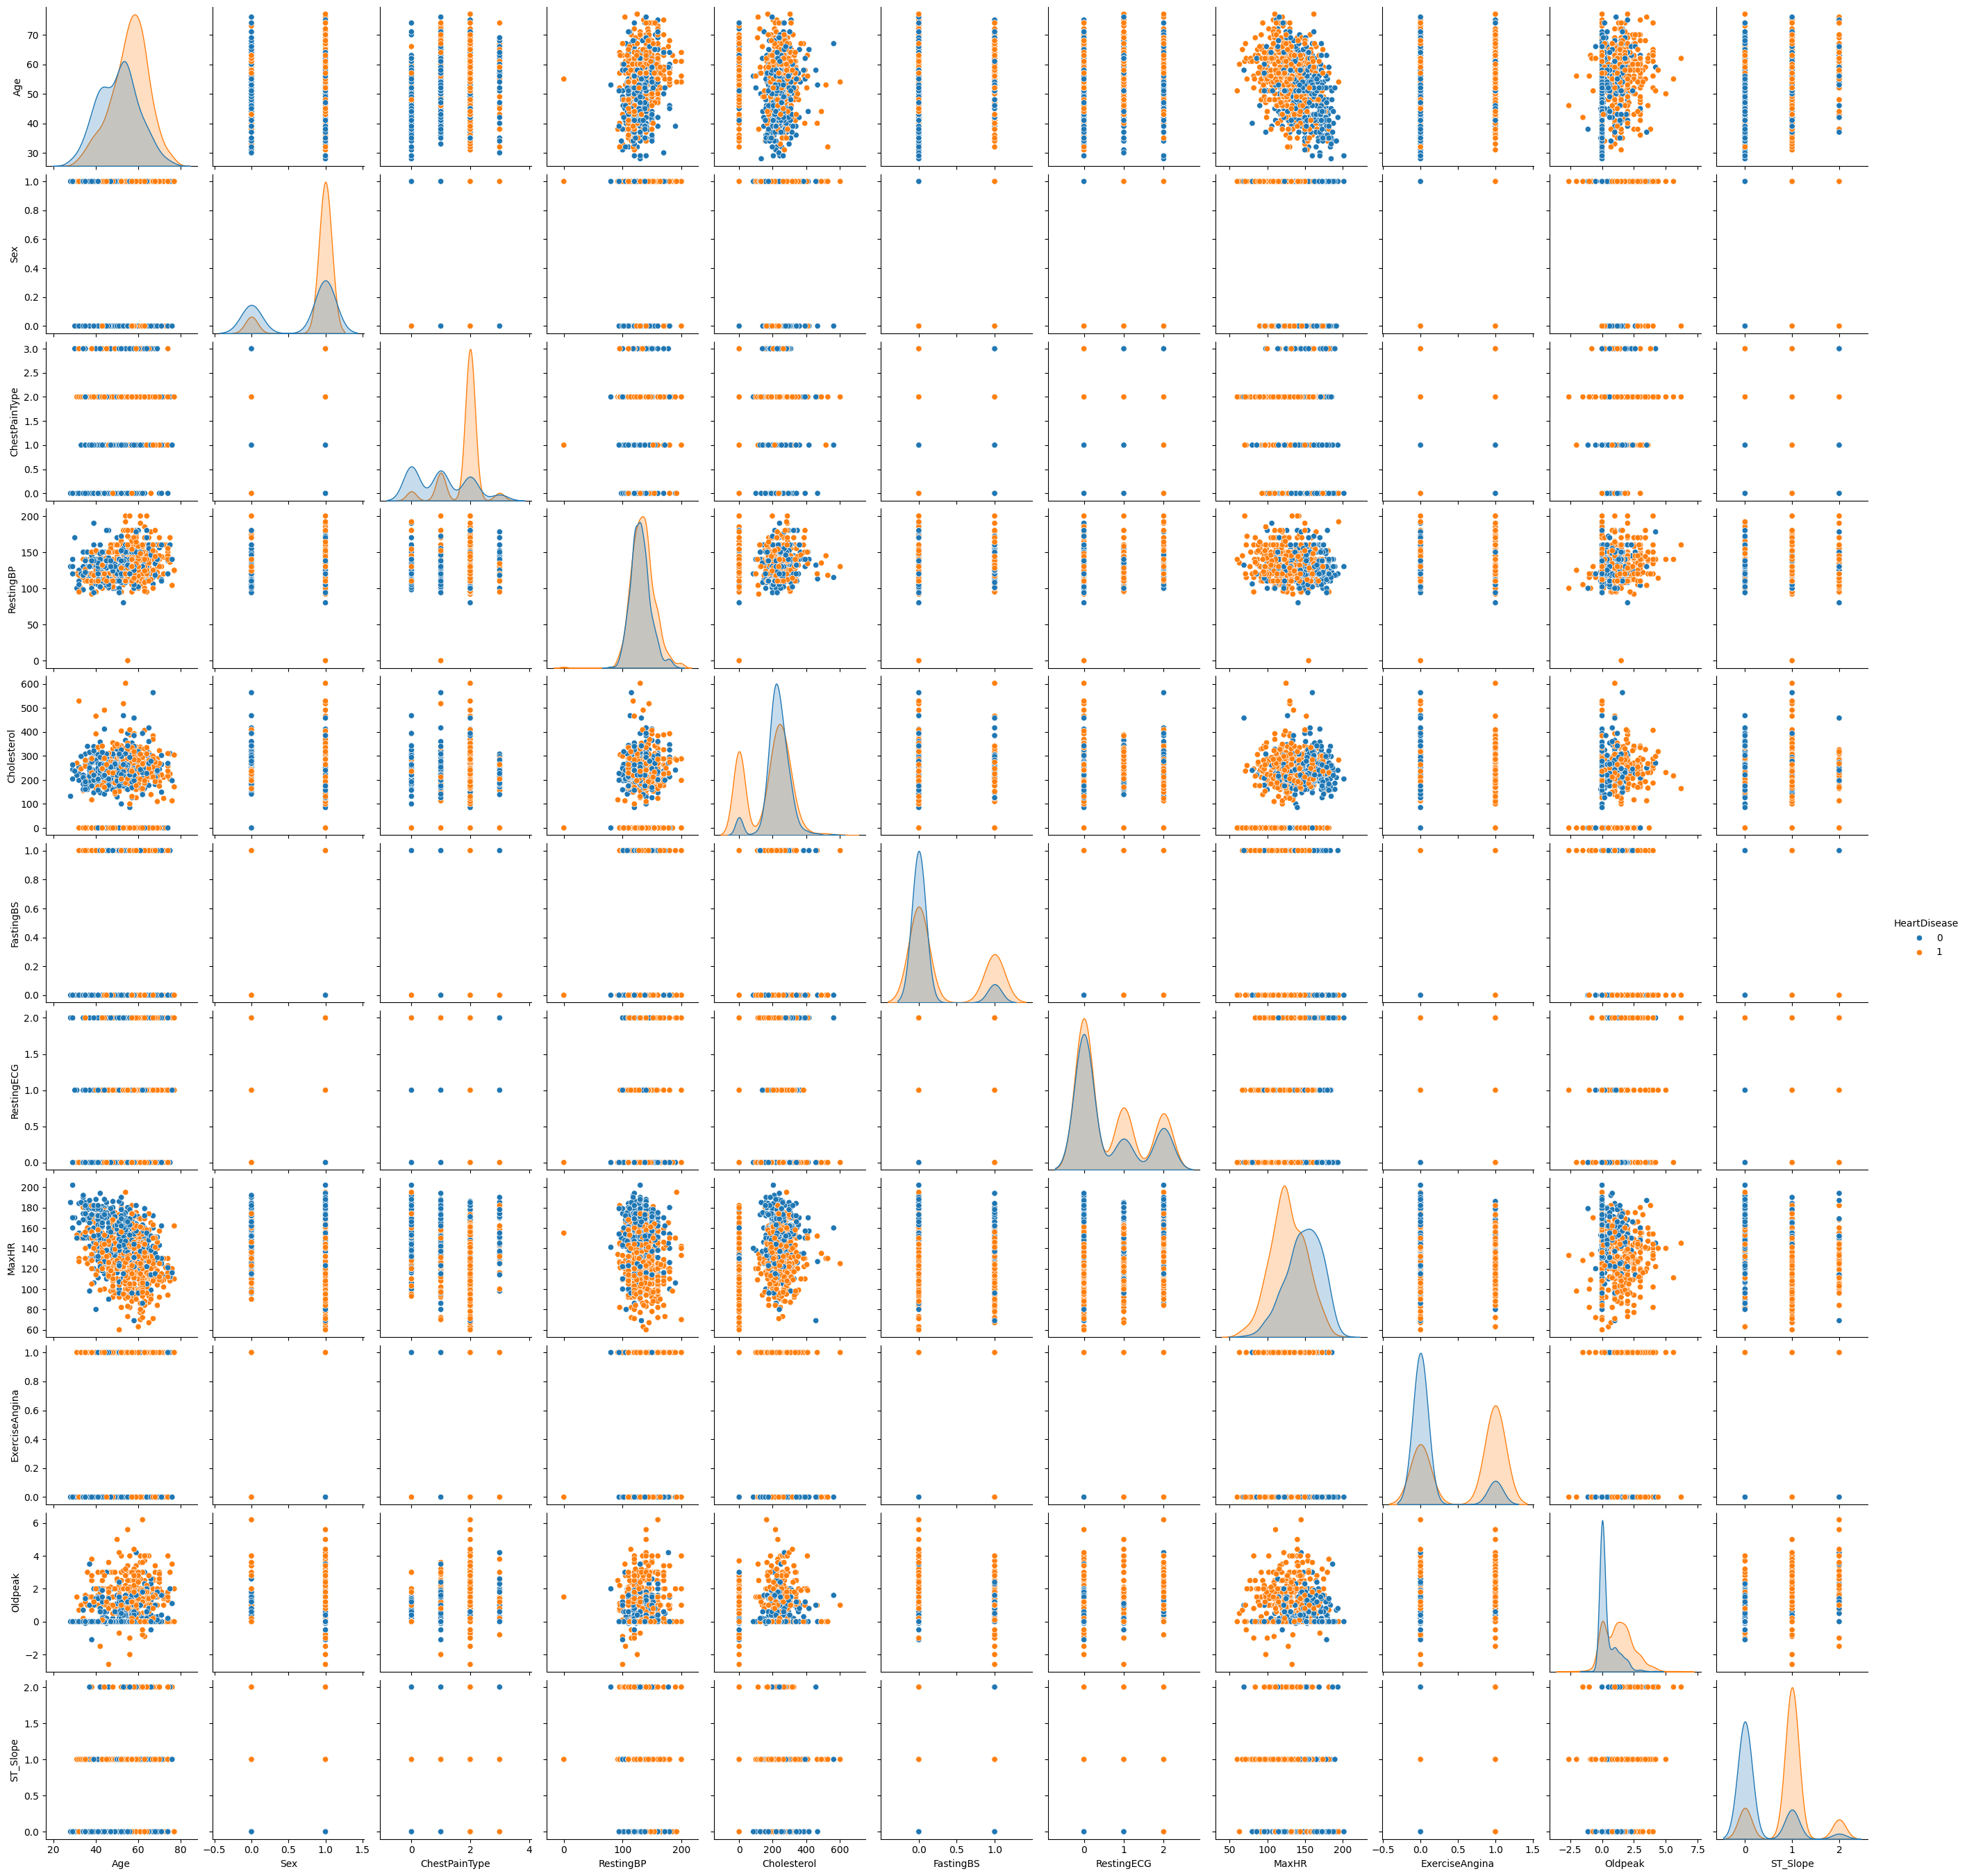

In [10]:
sns.pairplot(data, hue='HeartDisease')
plt.show()

In [11]:
#TODO czy robic outlier detection przed klasteryzacja

In [12]:
#TODO ile kolumn i jakie, czy mozemy obcinac kolumny

In [ ]:
# ja bym obcial ExerciseAngina - ból dławicowy w klatce piersiowej podczas wysiłku, ChestPainType - klasyfikacja rodzaj ubólu w klatce piersiowej i ST_slope - część wykresu EKG wznosi się, jest płaski, opada

In [54]:
warnings.filterwarnings("ignore", category=FutureWarning)

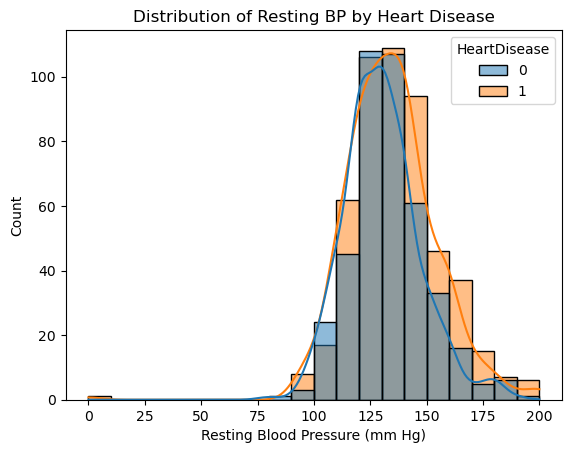

In [55]:
sns.histplot(x='RestingBP', hue='HeartDisease', data=data, kde=True, bins=20)
plt.title('Distribution of Resting BP by Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.show()


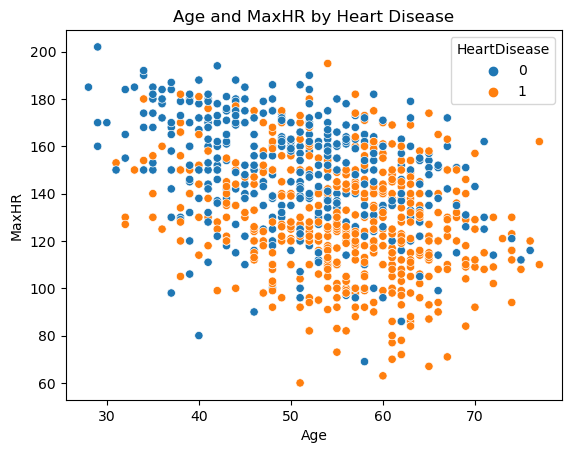

In [8]:
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=data)
plt.title('Age and MaxHR by Heart Disease')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

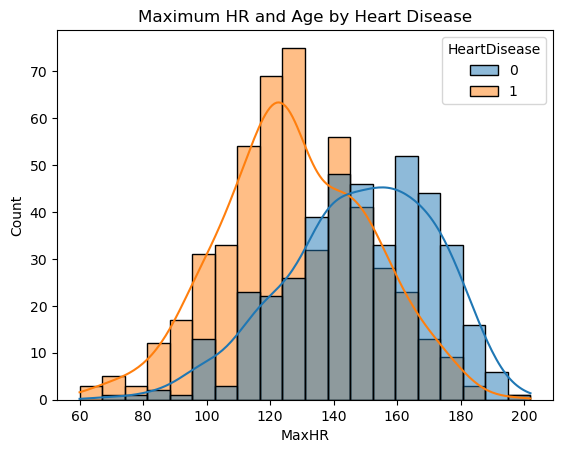

In [56]:
sns.histplot(x='MaxHR', hue='HeartDisease', data=data, kde=True, bins=20)
plt.title('Maximum HR and Age by Heart Disease')
plt.show()

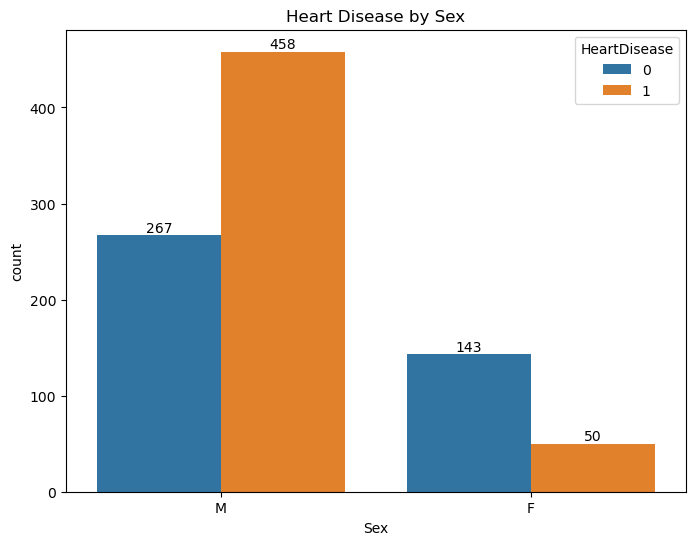

In [45]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Heart Disease by Sex')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


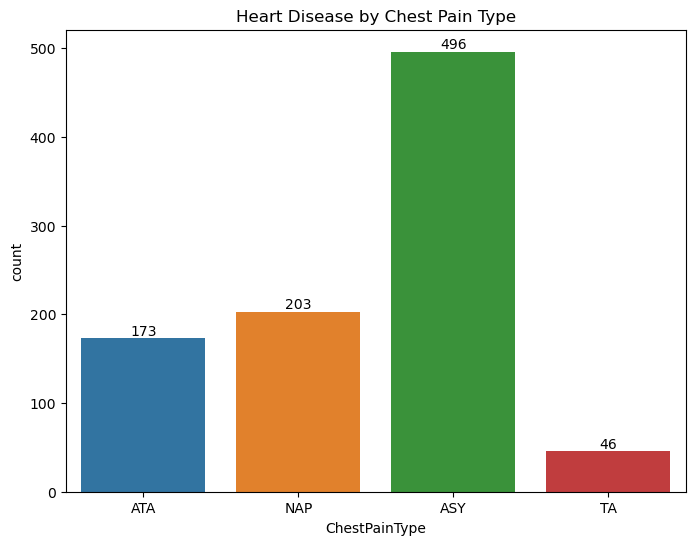

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ChestPainType', data=data)
plt.title('Heart Disease by Chest Pain Type')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()
# ATA – Typowy ból dławicowy, ustepuje po odpoczynku lub po lekach (Asymptomatic Typical Angina)
# NAP – Nietypowy ból dławicowy (Non-Anginal Pain)
# ASY – Bezobjawowy (Asymptomatic)
# TA – Ból inny niż dławicowy, ustępuje po krótkim czasie (Typical Angina)



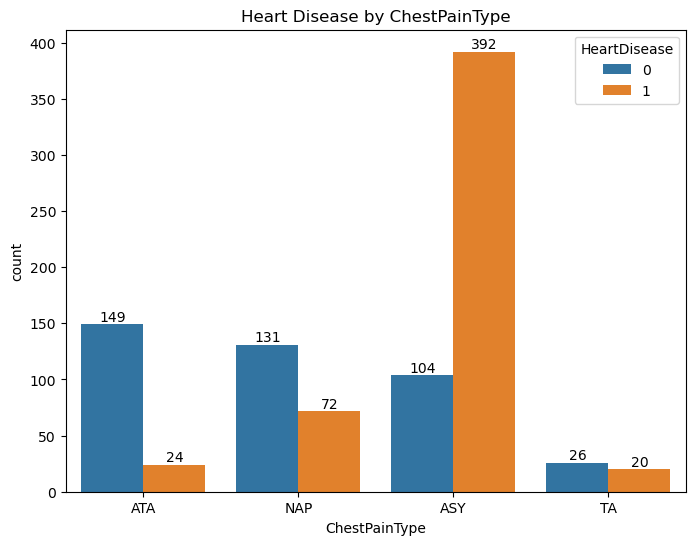

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Heart Disease by ChestPainType')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

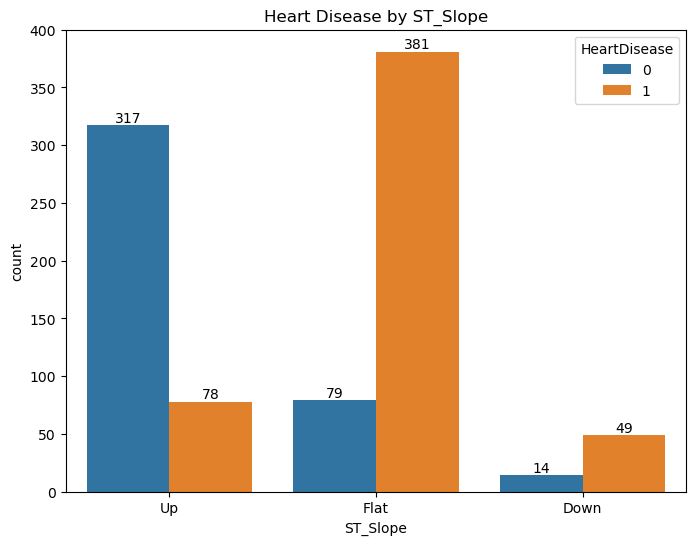

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)
plt.title('Heart Disease by ST_Slope')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

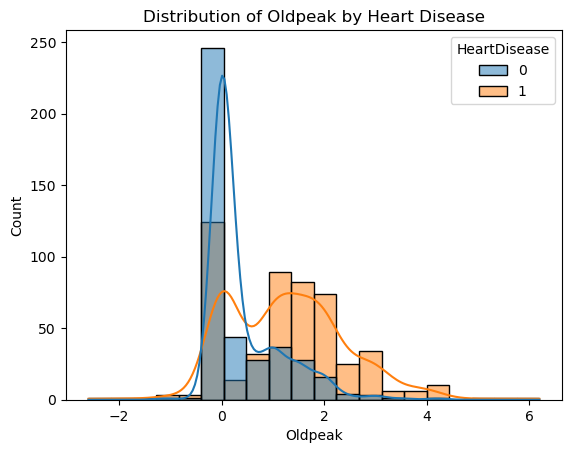

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64


In [57]:
sns.histplot(x='Oldpeak', hue='HeartDisease', data=data, kde=True, bins=20)
plt.title('Distribution of Oldpeak by Heart Disease')
plt.show()
print(data["Oldpeak"])

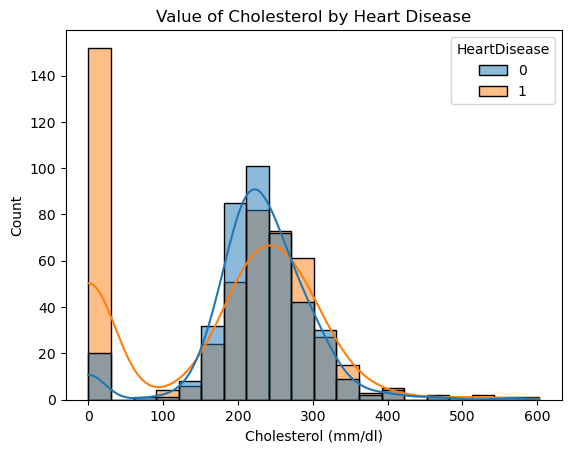

In [58]:
sns.histplot(x='Cholesterol', hue='HeartDisease', data=data, kde=True, bins=20)
plt.title('Value of Cholesterol by Heart Disease')
plt.xlabel('Cholesterol (mm/dl)')
plt.show()

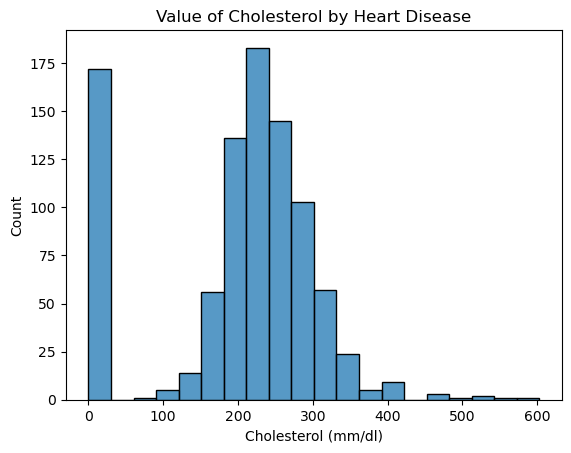

In [60]:
sns.histplot(x='Cholesterol', data=data, bins=20)
plt.title('Value of Cholesterol by Heart Disease')
plt.xlabel('Cholesterol (mm/dl)')
plt.show()
#prawidlowe wartosci do okolo 200 
# wysoki poziom od okolo 250 